# Various sequential tests 2

In [91]:
# import libraries
import math
import time
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
from scipy.optimize import fsolve

## 1) Tests of variance of normal distribution

The goal is now to test

H0: $\sigma^2=\sigma^2_0$

against

H1: $\sigma^2=\sigma^2_1$.

First, we assume our random sample to have been drawn from N $(\mu,\sigma^2)$, where $\mu$ is known in prior.

**Warning:** The variables named *sigma* generally represent $\sigma^2$. To access actual $\sigma$, use *math.sqrt(sigma)* in code.

In [92]:
###
# The first version of the test is more of an elegent/mathematical version
# which only takes alpha and beta as arguments.
#
# It is useless though if one wants to run the tests 10000 times over and over.
#
# The second version is more of a butcher-programmerish version
# which is less elegant but runs considerably faster.
###


def testN1( alpha, beta, mu, sigma, n = 1, verbose = False ):
    # init values
    a = math.log( (1-beta) / alpha )
    b = math.log( beta / (1-alpha) )
    ha = 2*a / ( 1/sigma0 - 1/sigma1 )
    hb = 2*b / ( 1/sigma0 - 1/sigma1 )
    s = 2*math.log( math.sqrt(sigma1/sigma0) ) / ( 1/sigma0 - 1/sigma1 )
    # examine critical inequality
    counter = 1
    x = np.random.normal( mu, math.sqrt(sigma), size = n )
    Z = sum( (x-mu)**2 )
    while hb + (n*counter)*s < Z and Z < ha + (n*counter)*s:
        counter += 1
        x = np.append( x, np.random.normal( mu, math.sqrt(sigma), size = n ) ) # extend the sample
        Z = sum( (x-mu)**2 ) # recalculate Z statistic
    if verbose:
        print( 'data = \n', np.round( x, decimals = 3 ).reshape( -1, n ) )
        print( counter-1, 'sample extensions required' )
    if Z > ha + (n*counter)*s: return True
    else: return False
    
def testN1_fast( ha, hb, s, mu, sigma, n = 1, verbose = False ):
    counter = 1
    x = np.random.normal( mu, math.sqrt(sigma), size = n )
    Z = sum( (x-mu)**2 )
    while hb + (n*counter)*s < Z and Z < ha + (n*counter)*s:
        counter += 1
        x = np.append( x, np.random.normal( mu, math.sqrt(sigma), size = n ) ) # extend the sample
        Z = sum( (x-mu)**2 ) # recalculate Z statistic
    if verbose:
        print( 'data = \n', np.round( x, decimals = 3 ).reshape( -1, n ) )
        print( counter-1, 'sample extensions required' )
    if Z > ha + (n*counter)*s: return True
    else: return False

In [93]:
alpha = 0.05
beta = 0.05

mu = 0
sigma = 4

sigma0 = 1
sigma1 = 4

n = 5

print( testN1( alpha, beta, mu, sigma, n = 5, verbose = True ) )

data = 
 [[-0.065 -1.686  0.033 -0.117 -1.03 ]
 [ 1.578 -2.437 -2.674  0.503 -3.319]]
1 sample extensions required
True


It is however not necessary to know $\mu$ in advance. Just run the following test and see yourself.


In [94]:
def testN2( alpha, beta, mu, sigma, n = 1, verbose = False ):
    # init
    a = math.log( (1-beta) / alpha )
    b = math.log( beta / (1-alpha) )
    ha = 2*a / ( 1/sigma0 - 1/sigma1 )
    hb = 2*b / ( 1/sigma0 - 1/sigma1 )
    s = 2*math.log( math.sqrt(sigma1/sigma0) ) / ( sigma0**(-1) - sigma1**(-1) )
    # examine critical inequality
    counter = 1
    x = np.random.normal( mu, math.sqrt(sigma), size = n )
    m = np.mean(x)
    Z = sum( ( x - m )**2 )
    while hb + (n*counter)*s < Z and Z < ha + (n*counter)*s:
        counter += 1
        x = np.append( x, np.random.normal( mu, math.sqrt(sigma), size = n ) ) # extend the sample
        m = np.mean(x) # recalculate mean
        Z = sum( ( x - m )**2 ) # recalculate Z statistic
    if verbose:
        print( 'data = \n', np.round( x, decimals = 3 ) )
        print( counter-1, 'sample extensions required' )
    if Z > ha + (n*counter)*s: return True
    else: return False
    
def testN2_fast( ha, hb, s, mu, sigma, n = 1, verbose = False ):
    counter = 1
    x = np.random.normal( mu, math.sqrt(sigma), size = n )
    m = np.mean(x)
    Z = sum( ( x - m )**2 )
    while hb + (n*counter)*s < Z and Z < ha + (n*counter)*s:
        counter += 1
        x = np.append( x, np.random.normal( mu, math.sqrt(sigma), size = n ) ) # extend the sample
        m = np.mean(x) # recalculate mean
        Z = sum( ( x - m )**2 ) # recalculate Z statistic
    if verbose:
        print( 'data = \n', np.round( x, decimals = 3 ) )
        print( counter-1, 'sample extensions required' )
    if Z > ha + (n*counter)*s: return True
    else: return False

In [95]:
alpha = 0.05
beta = 0.05

sigma = 1

sigma0 = 1
sigma1 = 4

mu = np.round( np.random.uniform( 0.0, 10.0, 1), decimals = 0 ) # so that mu is truly unknown but not too exotic
print( testN2( alpha, beta, mu, sigma, n = 5, verbose = True ) )
print( 'Generated from mu =', mu)

data = 
 [5.047 8.216 5.839 6.566 4.117 6.365 6.971 7.524 4.14  6.142 5.925 5.087
 7.276 5.999 6.475]
2 sample extensions required
False
Generated from mu = [6.]


data = 
 [[ 5.761]
 [ 4.394]
 [ 6.149]
 [ 5.234]
 [ 6.071]
 [ 8.601]
 [ 5.737]
 [ 7.153]
 [10.013]]
8 sample extensions required
10
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


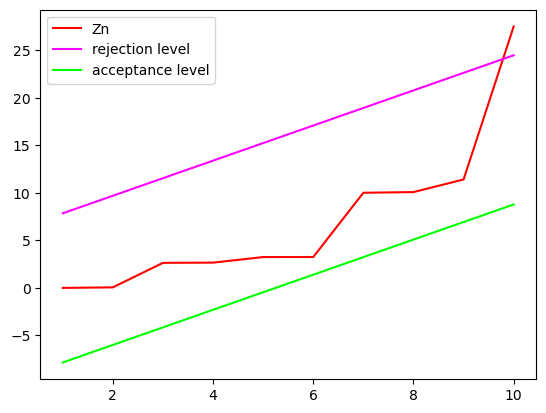

In [98]:
arr_lower = np.zeros(30)
arr_upper = np.zeros(30)
arr_Z = np.zeros(30)

def testN1_plot( ha, hb, s, mu, sigma, n = 1, verbose = False ):
    arr_Z[ 0 ] = 0
    arr_lower[ 0 ] = hb
    arr_upper[ 0 ] = ha
    counter = 1
    x = np.random.normal( mu, math.sqrt(sigma), size = n )
    Z = sum( (x-mu)**2 )
    # save initial values
    arr_Z[ counter ] = Z
    arr_lower[ counter ] = hb + (n*counter)*s
    arr_upper[ counter ] = ha + (n*counter)*s
    while hb + (n*counter)*s < Z and Z < ha + (n*counter)*s:
        counter += 1
        x = np.append( x, np.random.normal( mu, math.sqrt(sigma), size = n ) )
        Z = sum( (x-mu)**2 )
        # save newly calculated values
        arr_Z[ counter ] = Z
        arr_lower[ counter ] = hb + (n*counter)*s
        arr_upper[ counter ] = ha + (n*counter)*s
    if verbose:
        print( 'data = \n', np.round( x, decimals = 3 ).reshape( -1, n ) )
        print( counter-1, 'sample extensions required' )
    if Z > ha + (n*counter)*s: return True
    else: return False
    
alpha = 0.05
beta = 0.05

sigma0 = 1
sigma2 = 2

a = math.log( (1-beta) / alpha )
b = math.log( beta / (1-alpha) )
ha = 2*a / ( 1/sigma0 - 1/sigma1 )
hb = 2*b / ( 1/sigma0 - 1/sigma1 )
s = 2*math.log( math.sqrt(sigma1/sigma0) ) / ( 1/sigma0 - 1/sigma1 )

###
# tweek sigma for different progressions
###
testN1_plot( ha, hb, s, mu, sigma = 2, n = 1, verbose = True )

lower_trim_index = np.argmax(np.isnan(arr_lower))
upper_trim_index = np.argmax(np.isnan(arr_upper))
Z_trim_index = np.argmax(np.isnan(arr_Z))

trim_index = np.argmax( arr_lower == 0 )
arr_upper = arr_upper[ :trim_index ]
arr_lower = arr_lower[ :trim_index ]
arr_Z = arr_Z[ :trim_index ]
print(len(arr_Z))
arr_n = np.linspace( 1, len(arr_Z), len(arr_Z) )
print(arr_n)

plt.plot( arr_n, arr_Z, label = 'Zn', color = 'red' )
plt.plot( arr_n, arr_upper, label = 'rejection level', color = 'magenta' )
plt.plot( arr_n, arr_lower, label = 'acceptance level', color = 'lime' )
plt.legend()

plt.show()

Let's examine the mean size of the sample $\mathsf{E}N$ each test needs to decide.

We run the tests 100 times for a sequence of 200 values $\sigma_1^2$ and see how large samples were required on average for the tests to decide.

In [99]:
# auxiliary functions return sample sizes when decision was reached
def testN1_cnt( ha, hb, s, mu, sigma, n = 1, verbose = False ):
    counter = 1
    x = np.random.normal( mu, math.sqrt(sigma), size = n )
    Z = sum( (x-mu)**2 )
    while hb + (n*counter)*s < Z and Z < ha + (n*counter)*s:
        counter += 1
        x = np.append( x, np.random.normal( mu, math.sqrt(sigma), size = n ) ) # extend the sample
        Z = sum( (x-mu)**2 ) # recalculate Z statistic
    return n*counter

def testN2_cnt( ha, hb, s, mu, sigma, n = 1, verbose = False ):
    counter = 1
    x = np.random.normal( mu, math.sqrt(sigma), size = n )
    m = np.mean(x)
    Z = sum( ( x - m )**2 )
    while hb + (n*counter)*s < Z and Z < ha + (n*counter)*s:
        counter += 1
        x = np.append( x, np.random.normal( mu, math.sqrt(sigma), size = n ) ) # extend the sample
        m = np.mean(x) # recalculate mean
        Z = sum( ( x - m )**2 ) # recalculate Z statistic
    return n*counter

Computational time 7.695743560791016 seconds


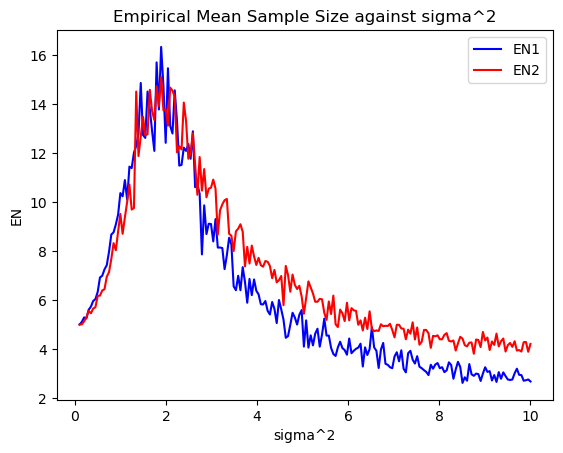

In [100]:
a = math.log( (1-beta) / alpha )
b = math.log( beta / (1-alpha) )
ha = 2*a / ( 1/sigma0 - 1/sigma1 )
hb = 2*b / ( 1/sigma0 - 1/sigma1 )
s = 2*math.log( math.sqrt(sigma1/sigma0) ) / ( sigma0**(-1) - sigma1**(-1) )

start = time.time()
N_pts = 200
N_tests = 100
arr_EN1 = np.empty( N_pts )
arr_EN2 = np.empty( N_pts )
arr_sigma = np.linspace( 0.1, 10.0, N_pts )

for i in range( N_pts ):
    arr_temp = np.array( [ testN1_cnt( ha, hb, s, mu, arr_sigma[ i ], n=1 ) for _ in range( N_tests ) ] )
    arr_EN1[ i ] = np.mean( arr_temp )
    arr_temp = np.array( [ testN2_cnt( ha, hb, s, mu, arr_sigma[ i ], n=1 ) for _ in range( N_tests ) ] )
    arr_EN2[ i ] = np.mean( arr_temp )
    
end = time.time()
print( 'Computational time', end - start, 'seconds')

plt.plot(arr_sigma, arr_EN1, color='blue', label='EN1')
plt.plot(arr_sigma, arr_EN2, color='red', label='EN2')
plt.xlabel('sigma^2')
plt.ylabel('EN')
plt.title('Empirical Mean Sample Size against sigma^2')
plt.legend()

plt.show()

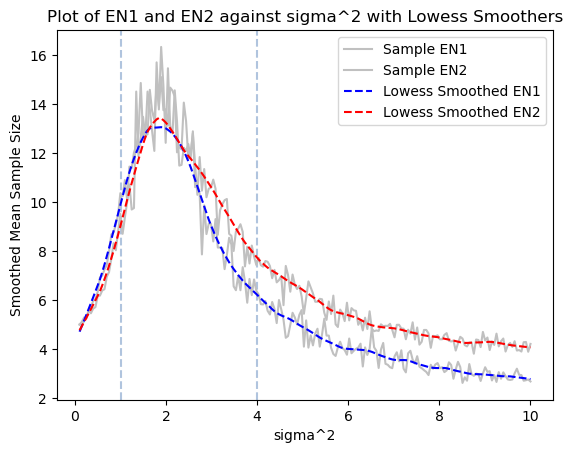

In [101]:
from statsmodels.nonparametric.smoothers_lowess import lowess

smoothed_EN1 = lowess(arr_EN1, arr_sigma, frac=0.1, return_sorted=False)
smoothed_EN2 = lowess(arr_EN2, arr_sigma, frac=0.1, return_sorted=False)

plt.axvline(x=1, color='lightsteelblue', linestyle='--')
plt.axvline(x=4, color='lightsteelblue', linestyle='--')

plt.plot(arr_sigma, arr_EN1, color='silver', label='Sample EN1')
plt.plot(arr_sigma, arr_EN2, color='silver', label='Sample EN2')

plt.plot(arr_sigma, smoothed_EN1, color='blue', linestyle='--', label='Lowess Smoothed EN1')
plt.plot(arr_sigma, smoothed_EN2, color='red', linestyle='--', label='Lowess Smoothed EN2')

plt.xlabel('sigma^2')
plt.ylabel('Smoothed Mean Sample Size')
plt.title('Plot of EN1 and EN2 against sigma^2 with Lowess Smoothers')
plt.legend()

plt.show()

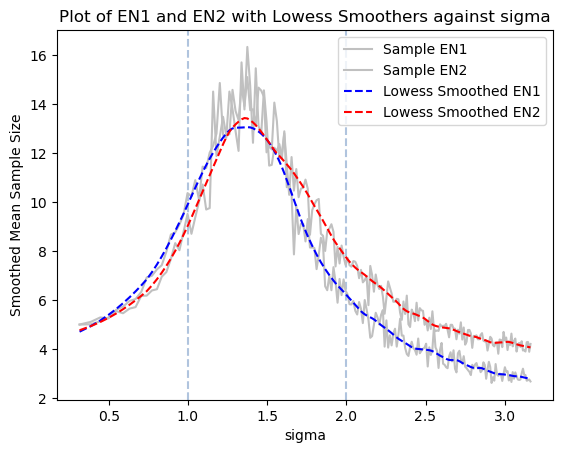

In [102]:
plt.axvline(x=1, color='lightsteelblue', linestyle='--')
plt.axvline(x=2, color='lightsteelblue', linestyle='--')

plt.plot(np.sqrt(arr_sigma), arr_EN1, color='silver', label='Sample EN1')
plt.plot(np.sqrt(arr_sigma), arr_EN2, color='silver', label='Sample EN2')

plt.plot(np.sqrt(arr_sigma), smoothed_EN1, color='blue', linestyle='--', label='Lowess Smoothed EN1')
plt.plot(np.sqrt(arr_sigma), smoothed_EN2, color='red', linestyle='--', label='Lowess Smoothed EN2')

plt.xlabel('sigma')
plt.ylabel('Smoothed Mean Sample Size')
plt.title('Plot of EN1 and EN2 with Lowess Smoothers against sigma')
plt.legend()

plt.show()

As for the **operational charcteristic**, it can be approached analytically or by a mindless simulation.

We will do both. First, the analytical approach relies on a function $h$ which follows
$$ \sigma^2=\frac{1-\Big{(}\frac{\sigma_0^2}{\sigma_1^2}\Big{)}^{h(\sigma^2)}}{\big{(}\sigma_0^{-2}-\sigma_1^{-2}\big{)}h(\sigma^2)}. $$

It is not really analytical from now on, we proceed numerically.

Having evaluated $h$ in enough points, we can plot the operational characteristic $L$ which roughly follows
$$L(\sigma^2)=\frac{1- \exp \{h(\sigma^2)a\} }{\exp \{h(\sigma^2)b\}-\exp \{h(\sigma^2)a\}}.$$

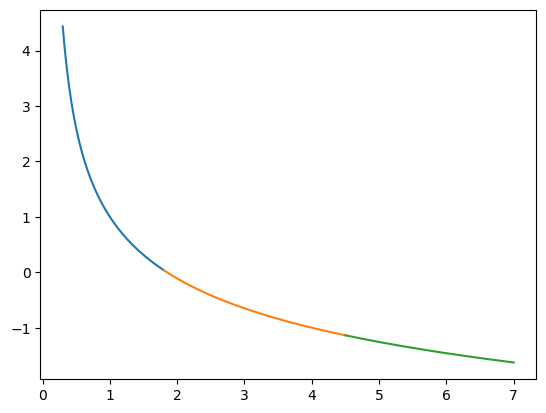

In [103]:
def equation_h(h, sigma, sigma0, sigma1):
    return sigma - (1 - (sigma0 / sigma1)**h) / ((1/sigma0 - 1/sigma1) * h)

arr_h_low = np.empty( 200 )
arr_h_mid = np.empty( 200 )
arr_h_hi = np.empty( 200 )
arr_sigma_low = np.linspace( 0.3, 1.8, 200 )
arr_sigma_mid = np.linspace( 1.8, 4.5, 200 )
arr_sigma_hi = np.linspace( 4.5, 7.0, 200 )

sigma =  4
sigma0 =  1.0
sigma1 =  4.0

h_init_low = 0.5
h_init_mid = -0.1
h_init_hi = -1.0

for i in range( 200 ):
    arr_h_low[ i ] = fsolve( equation_h, h_init_low, args=( arr_sigma_low[ i ], sigma0, sigma1 ) )
    arr_h_mid[ i ] = fsolve( equation_h, h_init_mid, args=( arr_sigma_mid[ i ], sigma0, sigma1 ) )
    arr_h_hi[ i ] = fsolve( equation_h, h_init_hi, args=( arr_sigma_hi[ i ], sigma0, sigma1 ) )

plt.plot( arr_sigma_low, arr_h_low )
plt.plot( arr_sigma_mid, arr_h_mid )
plt.plot( arr_sigma_hi, arr_h_hi )
plt.show()

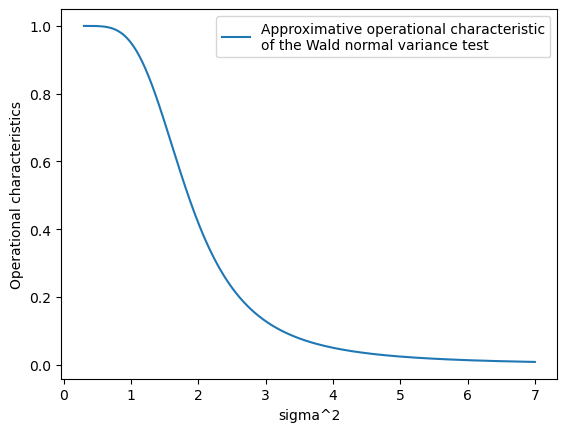

In [104]:
alpha = 0.05
beta = 0.05
a = math.log( (1-beta) / alpha )
b = math.log( beta / (1-alpha) )

arr_sigma_analytical = np.concatenate( (arr_sigma_low, arr_sigma_mid, arr_sigma_hi) )
arr_h = np.concatenate( (arr_h_low, arr_h_mid, arr_h_hi) )
arr_L_analytical = ( 1-np.exp(a*arr_h) ) / ( np.exp(b*arr_h) - np.exp(a*arr_h) )

plt.plot( arr_sigma_analytical, arr_L_analytical,
          label = 'Approximative operational characteristic\nof the Wald normal variance test' )
plt.xlabel( 'sigma^2' )
plt.ylabel( 'Operational characteristics' )
plt.legend()

plt.show()

Operational characteristics may be of interest as well.

Let's simulate them too.

We run the tests for multiple values of $\sigma^2$ and examine portion of rejections at the given point $\sigma_i^2$.

Computational time 10.625317335128784 seconds


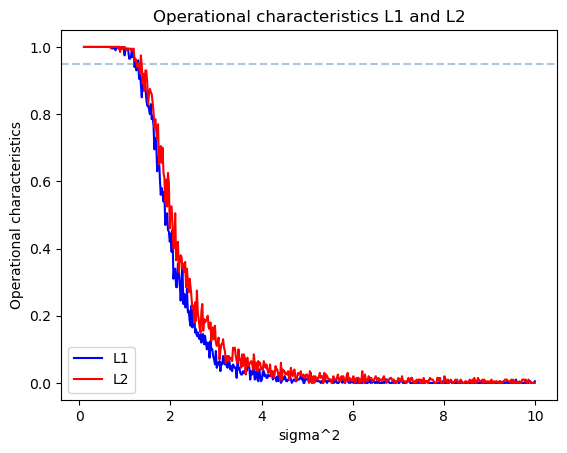

In [105]:
sigma0 = 1
sigma1 = 4

a = math.log( (1-beta) / alpha )
b = math.log( beta / (1-alpha) )

ha = 2*a / ( 1/sigma0 - 1/sigma1 )
hb = 2*b / ( 1/sigma0 - 1/sigma1 )
s = 2*math.log( math.sqrt(sigma1/sigma0) ) / ( 1/sigma0 - 1/sigma1 )

start = time.time()
N_pts = 500
N_tests = 200
arr_L1 = np.empty( N_pts )
arr_L2 = np.empty( N_pts )
arr_sigma = np.linspace( 0.1, 10.0, N_pts )

for i in range( N_pts ):
    arr_temp = 1 - np.array( [ testN1_fast( ha, hb, s, mu, arr_sigma[ i ], n=5 ) for _ in range( N_tests ) ] )
    arr_L1[ i ] = np.sum( arr_temp ) / N_tests
    arr_temp = 1 - np.array( [ testN2_fast( ha, hb, s, mu, arr_sigma[ i ], n=5 ) for _ in range( N_tests ) ] )
    arr_L2[ i ] = np.sum( arr_temp ) / N_tests
    
end = time.time()
print( 'Computational time', end - start, 'seconds')

plt.axhline(y=0.95, color='lightsteelblue', linestyle='--')
plt.plot(arr_sigma, arr_L1, color='blue', label='L1')
plt.plot(arr_sigma, arr_L2, color='red', label='L2')
plt.xlabel('sigma^2')
plt.ylabel('Operational characteristics')
plt.title('Operational characteristics L1 and L2')
plt.legend()

plt.show()

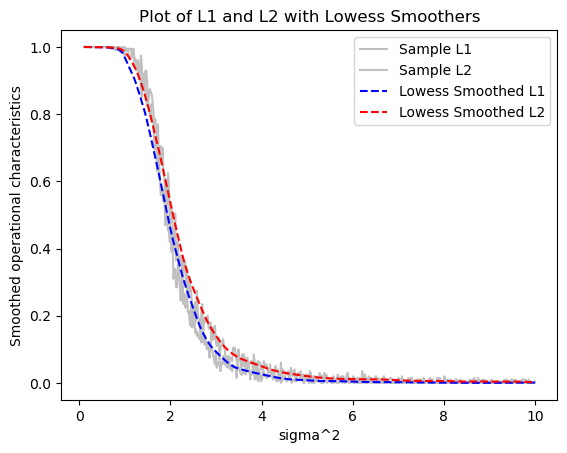

In [106]:
from statsmodels.nonparametric.smoothers_lowess import lowess

smoothed_L1 = lowess(arr_L1, arr_sigma, frac=0.1, return_sorted=False)
smoothed_L2 = lowess(arr_L2, arr_sigma, frac=0.1, return_sorted=False)

plt.plot(arr_sigma, arr_L1, color='silver', label='Sample L1')
plt.plot(arr_sigma, arr_L2, color='silver', label='Sample L2')

plt.plot(arr_sigma, smoothed_L1, color='blue', linestyle='--', label='Lowess Smoothed L1')
plt.plot(arr_sigma, smoothed_L2, color='red', linestyle='--', label='Lowess Smoothed L2')

plt.xlabel('sigma^2')
plt.ylabel('Smoothed operational characteristics')
plt.title('Plot of L1 and L2 with Lowess Smoothers')
plt.legend()

plt.show()

We have seen quite a lot of functions which aim to approximate the operational characteristic. Let's see whether they behave similarly. Then we can be sure they are somewhat correct or at least equally wrong.

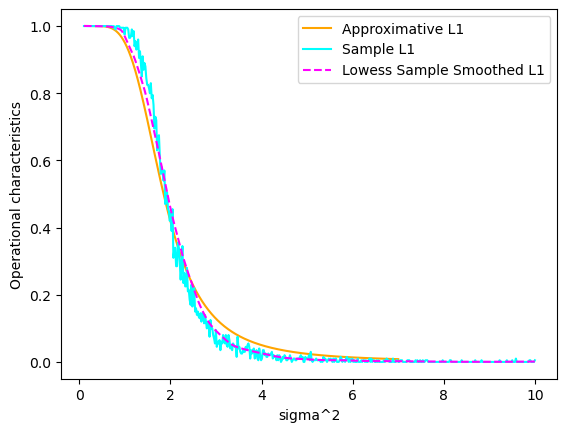

In [107]:
plt.plot( arr_sigma_analytical, arr_L_analytical,
          label = 'Approximative L1', color='orange' )
plt.plot( arr_sigma, arr_L1, color='aqua', label='Sample L1' )

plt.plot( arr_sigma, smoothed_L1, color='magenta', linestyle='--', label='Lowess Sample Smoothed L1' )
plt.xlabel( 'sigma^2' )
plt.ylabel( 'Operational characteristics' )
plt.legend()

plt.show()

Compare analytical and sample $\mathsf{E}N$.

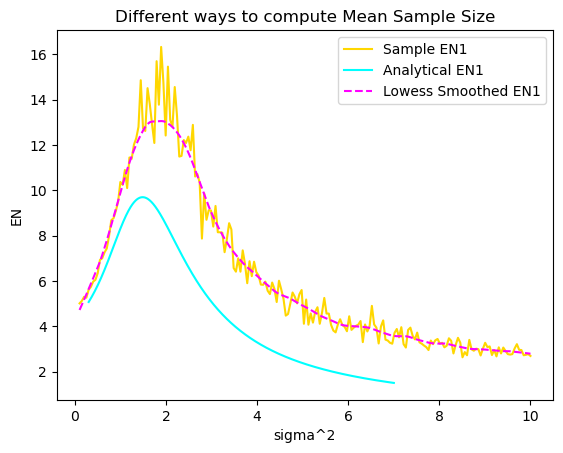

In [110]:
sigma0 = 1
sigma1 = 4

arr_sigma = np.linspace( 0.1, 10.0, 200 )

a = math.log( ( 1-0.05 ) / 0.05 )
b = math.log( 0.05 / ( 1-0.05 ) )

arr_EN_analytical = (
    ( arr_L_analytical*b + (1-arr_L_analytical)*a ) /
    ( arr_sigma_analytical/2 * (1/sigma0 - 1/sigma1) - math.log( math.sqrt(sigma1/sigma0) ) )
                    )
plt.plot( arr_sigma, arr_EN1, color='gold', label='Sample EN1' )
plt.plot( arr_sigma_analytical, arr_EN_analytical, color='aqua', label='Analytical EN1' )
plt.plot( arr_sigma, smoothed_EN1, color='magenta', linestyle='--', label='Lowess Smoothed EN1' )
plt.xlabel( 'sigma^2' )
plt.ylabel( 'EN' )
plt.title( 'Different ways to compute Mean Sample Size' )
plt.legend()
plt.show()

Finally, compare the tests head-to-head. Both tests run 10000 times.

In the first scenario, the tests are not supposed to reject $\mathsf{H}_0$.

Precision: [0.9836 0.9925]
Computation time: [1.81148696 5.69364715]


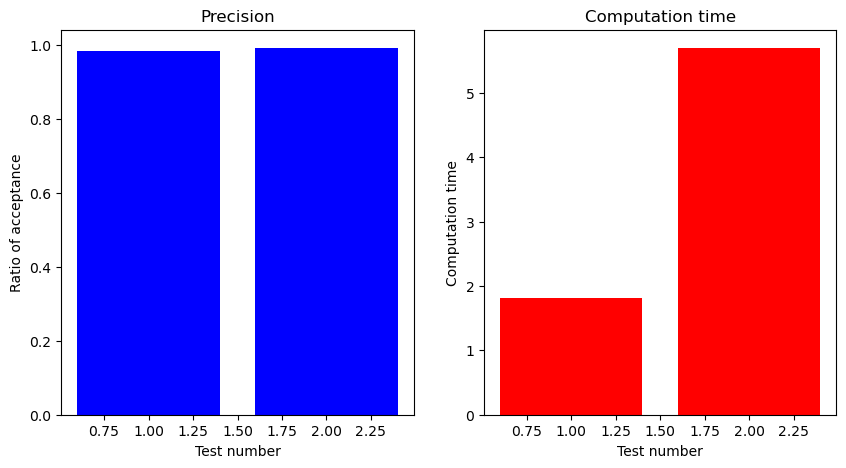

In [71]:
N_tests = 10000

alpha = 0.05
beta = 0.05

mu1 = 0
mu2 = np.random.uniform( 0.0, 1.0, 1 )
sigma = 1 # rejection NOT expected

sigma0 = 1
sigma1 = 4

a = math.log( (1-beta) / alpha )
b = math.log( beta / (1-alpha) )

ha = 2*a / ( 1/sigma0 - 1/sigma1 )
hb = 2*b / ( 1/sigma0 - 1/sigma1 )
s = 2*math.log( math.sqrt(sigma1/sigma0) ) / ( 1/sigma0 - 1/sigma1 )

start_t1 = time.time()
arr_res1 = np.array( [ testN1_fast( ha, hb, s, mu1, sigma ) for _ in range( N_tests ) ] )
start_t2 = time.time()
arr_res2 = np.array( [ testN2_fast( ha, hb, s, mu2, sigma ) for _ in range( N_tests ) ] )
end_t = time.time()

y1 = ( N_tests - np.sum( arr_res1 ) ) / N_tests
y2 = ( N_tests - np.sum( arr_res2 ) ) / N_tests

arr_x = np.array( [ 1, 2 ] )
arr_y = np.array( [ y1, y2 ] )
arr_t = np.array( [
    start_t2 - start_t1,
    end_t - start_t2
] )

print( 'Precision:', arr_y )
print( 'Computation time:', arr_t )


fig, axs = plt.subplots( 1, 2, figsize=(10, 5) )

axs[0].bar( arr_x, arr_y, color='blue' )
axs[0].set_title( 'Precision' )
axs[0].set_xlabel( 'Test number' )
axs[0].set_ylabel( 'Ratio of acceptance' )

axs[1].bar( arr_x, arr_t, color='red' )
axs[1].set_title( 'Computation time' )
axs[1].set_xlabel( 'Test number' )
axs[1].set_ylabel( 'Computation time' )

plt.show()

We can do a similar thing in a world where the tests should reject.

Precision: [0.9598 0.9201]
Computation time: [1.33699632 4.47482038]


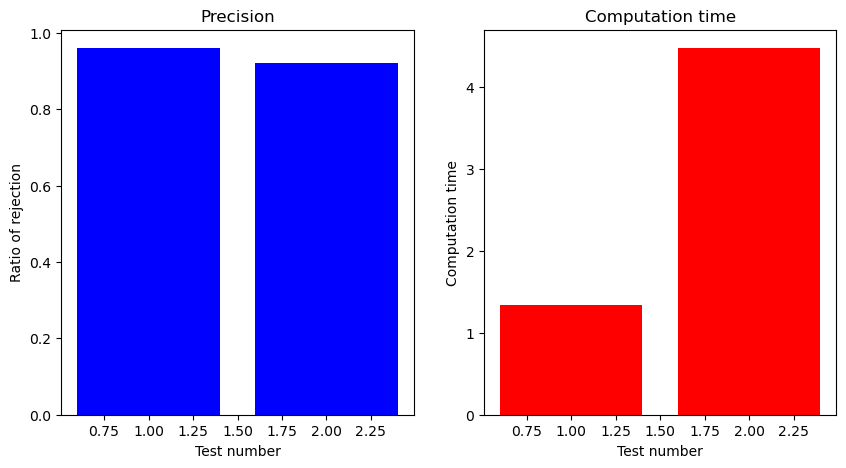

In [72]:
N_tests = 10000

alpha = 0.05
beta = 0.05

mu1 = 0
mu2 = np.random.uniform( 0.0, 1.0, 1 )
sigma = 4 # rejection is expected now

sigma0 = 1
sigma1 = 4

a = math.log( (1-beta) / alpha )
b = math.log( beta / (1-alpha) )

ha = 2*a / ( 1/sigma0 - 1/sigma1 )
hb = 2*b / ( 1/sigma0 - 1/sigma1 )
s = 2*math.log( math.sqrt(sigma1/sigma0) ) / ( sigma0**(-1) - sigma1**(-1) )

start_t1 = time.time()
arr_res1 = np.array( [ testN1_fast( ha, hb, s, mu1, sigma ) for _ in range( N_tests ) ] )
start_t2 = time.time()
arr_res2 = np.array( [ testN2_fast( ha, hb, s, mu2, sigma ) for _ in range( N_tests ) ] )
end_t = time.time()

y1 = np.mean( arr_res1 )
y2 = np.mean( arr_res2 )

arr_x = np.array( [ 1, 2 ] )
arr_y = np.array( [ y1, y2 ] )
arr_t = np.array( [
    start_t2 - start_t1,
    end_t - start_t2
] )

print( 'Precision:', arr_y )
print( 'Computation time:', arr_t )


fig, axs = plt.subplots( 1, 2, figsize=(10, 5) )

axs[0].bar( arr_x, arr_y, color='blue' )
axs[0].set_title( 'Precision' )
axs[0].set_xlabel( 'Test number' )
axs[0].set_ylabel( 'Ratio of rejection' )

axs[1].bar( arr_x, arr_t, color='red' )
axs[1].set_title( 'Computation time' )
axs[1].set_xlabel( 'Test number' )
axs[1].set_ylabel( 'Computation time' )

plt.show()